<a href="https://colab.research.google.com/github/tahereh-fahi/AI-ML-projects/blob/main/CO2_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Module 4 - time series - CO2 concentration

---



## pip installs


In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from statsmodels.tsa.ar_model import AutoReg
from scipy.interpolate import interp1d



#(2) The Mauna Loa CO_2 Concentration (Autograded and Written Report)

## **(2.1)AutoGraded**

### uploading data




In [ ]:
co2_df = pd.read_csv('CO2.csv')
co2_df = co2_df[2:].astype(float)
co2_df =co2_df.reset_index(drop=True)
co2_df = co2_df.replace(-99.99,np.nan).dropna()
co2_df['index'] = (co2_df.index.values+0.5)/12
co2_df.index = co2_df.iloc[:,10]

co2_df_month = co2_df.iloc[:,1]
co2_df = co2_df.iloc[:,4]

# print(co2_df.head())
# print(co2_df_month.head())
# if len(co2_df)==len(co2_df_month):
#   print('correct')

### main dataset

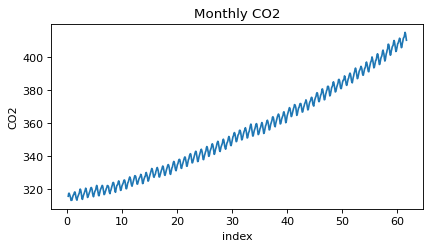

index
0.208333    315.70
0.291667    317.45
0.375000    317.51
0.541667    315.86
0.625000    314.93
Name:      CO2, dtype: float64

In [ ]:
plt.figure(figsize=(6, 3), dpi=80)
subset = co2_df
sns.lineplot(subset)
plt.title("Monthly CO2")
plt.ylabel('CO2')
plt.show()
subset.head()

### splitting dataset

In [ ]:
X_all = co2_df.index.values.reshape(-1, 1)
y_all = co2_df.values.reshape(-1, 1)

N = len(co2_df)
n_train = math.ceil(0.8*N)

X_train = X_all[:n_train+1,]
y_train = y_all[:n_train+1]
co2_df_month_train = co2_df_month.iloc[:n_train+1,]

X_test = X_all[n_train+1:,]
y_test = y_all[n_train+1:]

split_position = X_all[n_train+1,:].flatten()

print('N_all = ', N)
print('N_train = ', n_train)
print('N_test = ',N-n_train)

N_all =  733
N_train =  587
N_test =  146


### Assiging Variables

In [ ]:
RMSES = {}
MAPES = {}
x = X_train
y = y_train
month_ind_train = co2_df_month_train.values


### * Fitting a Linear Model


aplpha0 =  [308.97162006]
alpha1 =  [[1.40788184]]


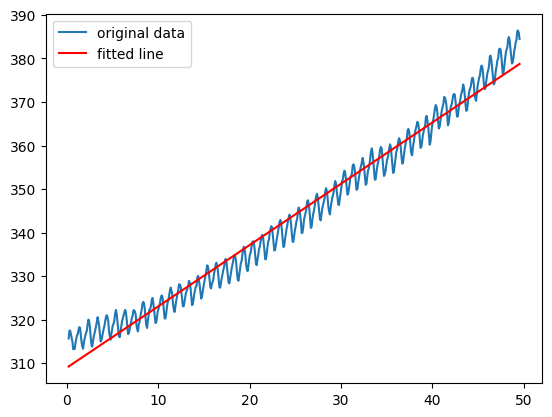

RMSE Linear model =  10.607474511460724
MAPE Linear model =  2.440776892880646


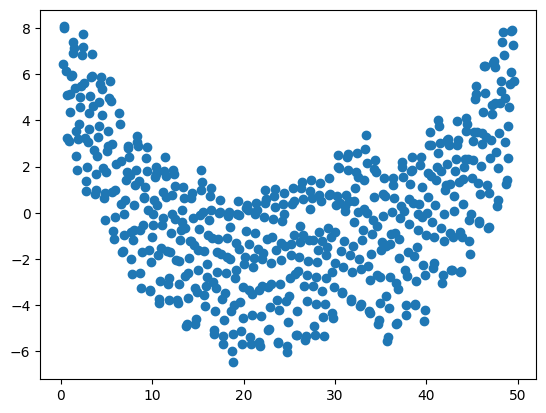

In [ ]:
clf = linear_model.LinearRegression()
clf.fit(x, y)
print('aplpha0 = ', clf.intercept_)
print('alpha1 = ', clf.coef_)
y_hat = clf.predict(x)
plt.plot(x, y, label='original data')
plt.plot(x, y_hat, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals = y - y_hat
plt.plot(x, linear_residuals,'o')

y_hat_test = clf.predict(X_test)
print('RMSE Linear model = ',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
print('MAPE Linear model = ',metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100)

RMSES['Linear model'] = (np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
MAPES['Linear model'] = (metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100)

### * Fitting a Quadratic Model



aplpha0 =  [314.10517372]
alpha1 =  [[0.80137882 0.01213543]]


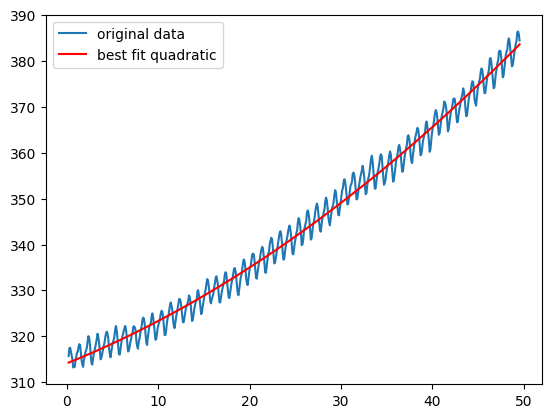

RMSE Quadratic model =  2.5084669646867597
MAPE Quadratic model =  0.5343308400556384


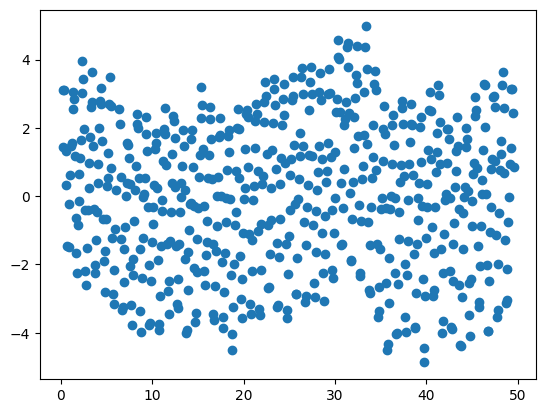

In [ ]:
# Difference in this text block: we're including this squared term
x_stacked = np.hstack((x, x**2))
clf_quad = linear_model.LinearRegression()
clf_quad.fit(x_stacked, y)
quadratic_y_hat = clf_quad.predict(x_stacked)
print('aplpha0 = ', clf_quad.intercept_)
print('alpha1 = ', clf_quad.coef_)
plt.plot(x, y, label='original data')
plt.plot(x, quadratic_y_hat, 'r', label='best fit quadratic')
plt.legend()
plt.show()
nonlinear_residuals = y - quadratic_y_hat
plt.plot(x, nonlinear_residuals,'o');

X_test_quad = np.hstack((X_test, X_test**2))
y_hat_test = clf_quad.predict(X_test_quad)
print('RMSE Quadratic model = ',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
print('MAPE Quadratic model = ',metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100)

RMSES['Quadratic model'] = (np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
MAPES['Quadratic model'] = (metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100)

### * Fitting a Cubic Model


aplpha0 =  [314.8470801]
alpha1 =  [[ 6.28211675e-01  2.07598357e-02 -1.15243612e-04]]


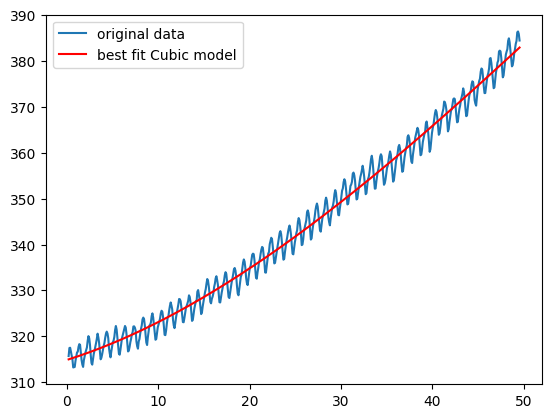

RMSE Cubic model =  4.0850365025481254
MAPE Cubic model =  0.834998900596552


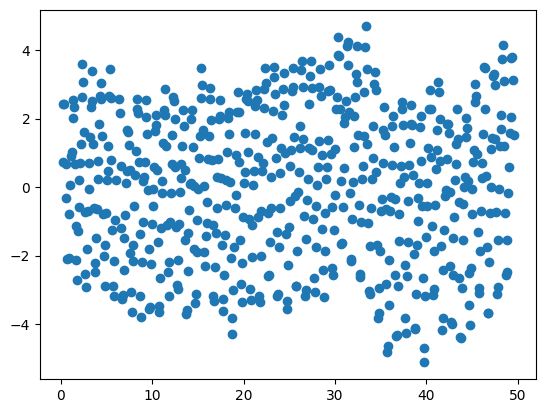

In [ ]:
# Difference in this text block: we're including this squared term
x_stacked = np.hstack((x, x**2, x**3))
clf = linear_model.LinearRegression()
clf.fit(x_stacked, y)
cubic_y_hat = clf.predict(x_stacked)
print('aplpha0 = ', clf.intercept_)
print('alpha1 = ', clf.coef_)
plt.plot(x, y, label='original data')
plt.plot(x, cubic_y_hat, 'r', label='best fit Cubic model')
plt.legend()
plt.show()
cubic_residuals = y - cubic_y_hat
plt.plot(x, cubic_residuals,'o');

X_test_quad = np.hstack((X_test, X_test**2, X_test**3))
y_hat_test = clf.predict(X_test_quad)
print('RMSE Cubic model = ',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
print('MAPE Cubic model = ',metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100)
RMSES['Cubic model'] = (np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
MAPES['Cubic model'] = (metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100)

### RMSE and MAPE plot

                           Model       RMSE      MAPE
Model                                                
Linear model        Linear model  10.607475  2.440777
Quadratic model  Quadratic model   2.508467  0.534331
Cubic model          Cubic model   4.085037  0.834999


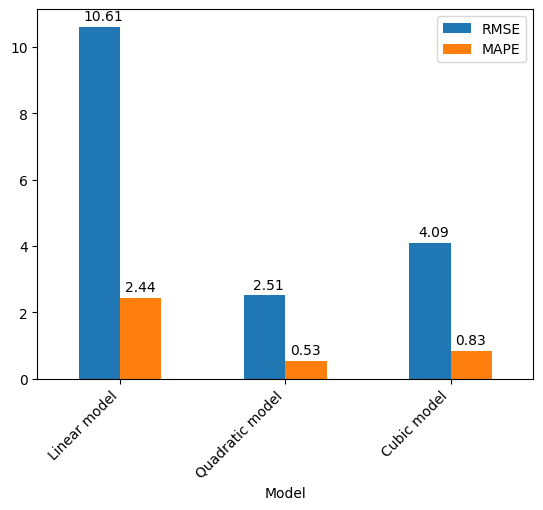

In [ ]:
dic1 = RMSES
dic2 = MAPES
# Convert the dictionaries to dataframes
df1 = pd.DataFrame(list(dic1.items()), columns=['Model', 'RMSE'])
df2 = pd.DataFrame(list(dic2.items()), columns=['Model', 'MAPE'])

# Merge the dataframes based on the 'Model' column
merged_df = pd.merge(df1, df2, on='Model')

# Show the merged dataframe
merged_df.index = merged_df.Model
print(merged_df)
ax = merged_df.plot(kind='bar')
# Add labels to the x-axis
plt.xticks(rotation=45, ha='right')

# Add labels on top of the bars
for i, v1, v2 in zip(range(len(merged_df)), merged_df['RMSE'], merged_df['MAPE']):
    ax.text(i-0.1, v1 + 0.2, str(round(v1, 2)), ha='center', color='black')
    ax.text(i+0.12, v2 + 0.2, str(round(v2, 2)), ha='center', color='black')


## (2.2) Written Report

## 1.
(3 points) Plot the periodic signal . (Your plot should have 1 data point for each month, so 12 in total.) Clearly state the definition the , and make sure your plot is clearly labeled.

[-0.014356515192267645, 0.6449419050775305, 1.3540274628457114, 2.560301158461808, 2.9813350743101705, 2.3149573268263732, 0.7764118734924285, -1.3025779269168607, -3.129453692056701, -3.3108582897463172, -2.082894538864337, -0.922929008287252]


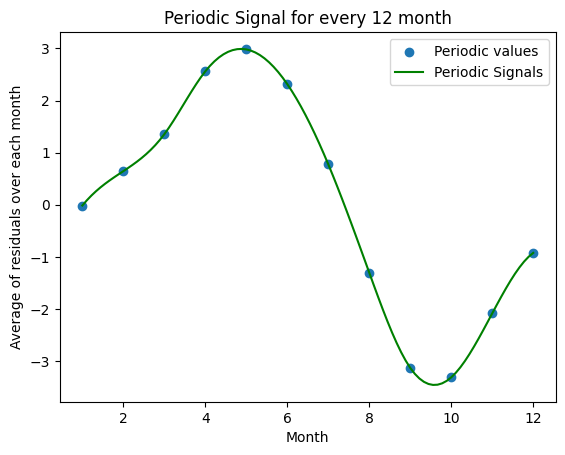

In [ ]:
# periods (P) is comuted with train data
# non_linear residuals (F) are over train data


periods = []

for i in range(1,13):
  periods.append(np.mean(nonlinear_residuals[month_ind_train==i]))

month_continuous = np.linspace(1,12,num = 100, endpoint =True)
periodic= interp1d(range(1,13), periods, kind = 'cubic')


plt.scatter(range(1,13), periods, label='Periodic values')
plt.plot(month_continuous,periodic(month_continuous), label='Periodic Signals', color='green')
plt.title('Periodic Signal for every 12 month')
plt.xlabel('Month')
plt.ylabel('Average of residuals over each month')
plt.legend()
print(periods)

## 2.
(2 points) Plot the final fit Screenshot 2023-04-17 at 12.26.08 PM.png. Your plot should clearly show the final model on top of the entire time series, while indicating the split between the training and testing data.

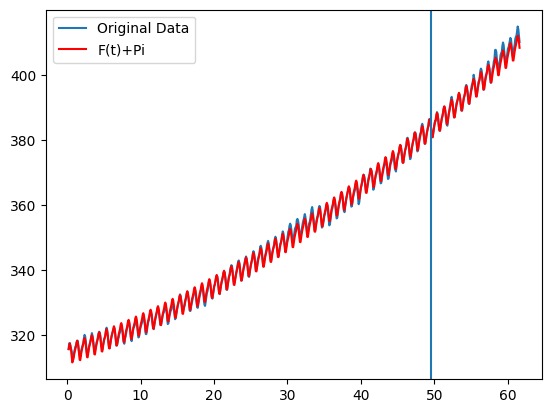

In [ ]:
x = X_all
y = y_all
month_ind = co2_df_month.astype(int).values


x_stacked = np.hstack((x, x**2))
quadratic_y_hat = clf_quad.predict(x_stacked)

Ft_plus_Pi = []
for i in range(0,N):
  p = month_ind[i]
  # print(quadratic_y_hat[i][0])
  # print(periods[p-1])
  Ft_plus_Pi.append(quadratic_y_hat[i][0] + periods[p-1])

plt.plot(x, y, label='Original Data')
plt.plot(x, Ft_plus_Pi, 'r', label='F(t)+Pi')
plt.legend()
split_position = X_all[n_train+1,:].flatten()
plt.axvline(split_position)
plt.show()


## 3.
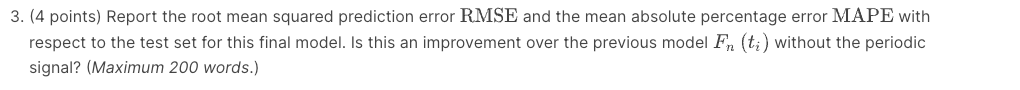

RMSE of Quadratic model + Periodic =  1.1313308271486542
MAPE of  Quadratic model +Periodic =  0.2053941433334688
{'Linear model': 10.607474511460724, 'Quadratic model': 2.5084669646867597, 'Cubic model': 4.0850365025481254, 'Quadratic model + Periodic': 1.1313308271486542}
{'Linear model': 2.440776892880646, 'Quadratic model': 0.5343308400556384, 'Cubic model': 0.834998900596552, 'Quadratic model + Periodic': 0.2053941433334688}


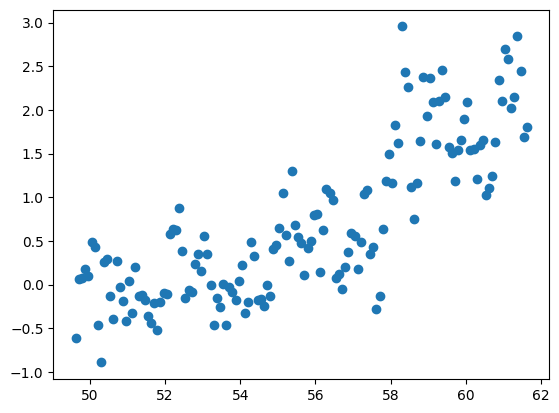

In [ ]:
Ft_plus_Pi_test = Ft_plus_Pi[n_train+1:]
res = y_test.flatten() - Ft_plus_Pi_test

plt.plot(X_test, res,'o');

y_hat_test = y_test + res.reshape(-1,1)

# print(y_test)
# print(res.reshape(-1,1))

# print('RMSE 1 Quadratic model = ',np.sqrt(np.mean(res**2)))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
mape = metrics.mean_absolute_percentage_error(y_test, y_hat_test)*100
RMSES['Quadratic model + Periodic'] = rmse
MAPES['Quadratic model + Periodic'] = mape
print('RMSE of Quadratic model + Periodic = ',rmse)
print('MAPE of  Quadratic model +Periodic = ',mape)
print(RMSES)
print(MAPES)
plt.show()




### RMSE and MAPE bar plot

                                                 Model       RMSE      MAPE
Model                                                                      
Linear model                              Linear model  10.607475  2.440777
Quadratic model                        Quadratic model   2.508467  0.534331
Cubic model                                Cubic model   4.085037  0.834999
Quadratic model + Periodic  Quadratic model + Periodic   1.131331  0.205394


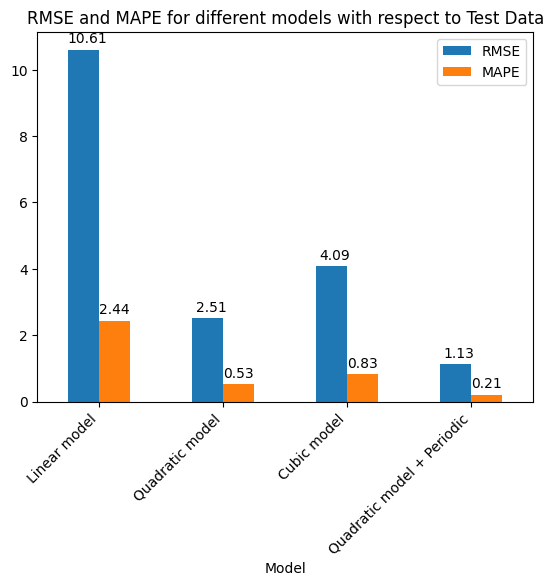

In [ ]:
dic1 = RMSES
dic2 = MAPES
# Convert the dictionaries to dataframes
df1 = pd.DataFrame(list(dic1.items()), columns=['Model', 'RMSE'])
df2 = pd.DataFrame(list(dic2.items()), columns=['Model', 'MAPE'])

# Merge the dataframes based on the 'Model' column
merged_df = pd.merge(df1, df2, on='Model')

# Show the merged dataframe
merged_df.index = merged_df.Model
print(merged_df)
ax = merged_df.plot(kind='bar')
# Add labels to the x-axis
plt.xticks(rotation=45, ha='right')
plt.title('RMSE and MAPE for different models with respect to Test Data')
# Add labels on top of the bars
for i, v1, v2 in zip(range(len(merged_df)), merged_df['RMSE'], merged_df['MAPE']):
    ax.text(i-0.1, v1 + 0.2, str(round(v1, 2)), ha='center', color='black')
    ax.text(i+0.12, v2 + 0.2, str(round(v2, 2)), ha='center', color='black')

In [ ]:
imp_rmse = merged_df.iloc[1,1]-merged_df.iloc[3,1]
imp_mape = merged_df.iloc[1,2]-merged_df.iloc[3,2]
print('improvement in RMSE = ', round(imp_rmse,3))
print('improvement in MAPE = ', round(imp_mape,3))

merged_df

improvement in RMSE =  1.377
improvement in MAPE =  0.329


,Model,RMSE,MAPE
Model,,,
Linear model,Linear model,10.607475,2.440777
Quadratic model,Quadratic model,2.508467,0.534331
Cubic model,Cubic model,4.085037,0.834999
Quadratic model + Periodic,Quadratic model + Periodic,1.131331,0.205394


## 4.
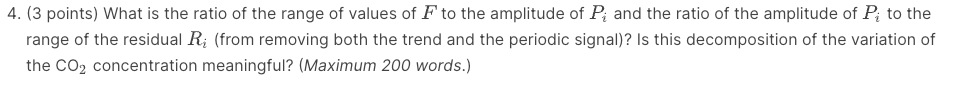

In [ ]:
def cal_amplitude(variable):

  # Find the highest and lowest values in the list
  highest_value = max(variable)
  lowest_value = min(variable)

  # Calculate the amplitude
  amplitude = abs(highest_value - lowest_value)

  return amplitude

x = X_train
x_stacked = np.hstack((x, x**2))
quadratic_y_hat = clf_quad.predict(x_stacked)

Ft_plus_Pi_train = Ft_plus_Pi[:n_train+1]
R_train = y_train.flatten() - Ft_plus_Pi_train

amp_P = cal_amplitude(periods)/2
amp_F = cal_amplitude(quadratic_y_hat.flatten())
amp_R = cal_amplitude(R_train)

print('Amplitude of P =',round(amp_P,2))
print('Range of F = ',round(amp_F,2))
print('Range of R = ',round(amp_R,2))

print('ratio of Range of F to Amplitude of P = ', round((amp_F/amp_P),2))
print('ratio of Amplitude of P to Range of R = ', round((amp_P/amp_R),2))


Amplitude of P = 3.15
Range of F =  69.32
Range of R =  3.84
ratio of Range of F to Amplitude of P =  22.03
ratio of Amplitude of P to Range of R =  0.82
